## Avaliando algoritmos de Classificação - Tuning de parâmetros com `GridSearch`  
- Näive Bayes: 93.80   
- Árvore de decisão: 98.2
- Random Forest: 98.40
- Regras: 97.40
- Knn: 98.60
- Regressão Logística: 94.60
- SVM: 98.8

In [53]:
import pickle
import numpy as np
import pandas as pd
# Para não aparecer avisos de warning no GridSearchCV
# Quando chegar na parte da rede neural - convergência
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.tree import DecisionTreeClassifier      # Arvore de Decisão
from sklearn.ensemble import RandomForestClassifier  # RandomForest
from sklearn.neighbors import KNeighborsClassifier   # k-vizinhos mais próximos (KNN)
from sklearn.linear_model import LogisticRegression # Regressão Logística
from sklearn.svm import SVC                          # Maquina de Vetor Suporte SVM
from sklearn.neural_network import MLPClassifier     # Multlayer Perceptron

In [4]:
with open('credit.pkl', 'rb') as file:
    X_credit_train, y_credit_train, X_credit_test, y_credit_test = pickle.load(file)

In [5]:
print(f'Base teste - shape: {X_credit_train.shape, y_credit_train.shape}') # 1500
print(f'Base treino - shape: {X_credit_test.shape, y_credit_test.shape}') # 500

Base teste - shape: ((1500, 3), (1500,))
Base treino - shape: ((500, 3), (500,))


Ao fazer o CrossValidation (CV) usaremos todos os registros. Para isso, concatena-se os arrays usando numpy.

In [6]:
X_credit = np.concatenate( (X_credit_train, X_credit_test), 
                          axis=0)
y_credit = np.concatenate( (y_credit_train, y_credit_test),
                          axis=0)

print(f'{X_credit.shape=}, {y_credit.shape=}')

X_credit.shape=(2000, 3), y_credit.shape=(2000,)


A classe GridSearchCV recebe como parâmetro `param_grid`. Abaixo encontra-se o dicionário contendo os parâmetros de cada classificador que iremos testar.

In [7]:
params_forest = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}
params_rnd_forest = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 40, 100, 150],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,5, 10]
}
params_knn = {'n_neighbors': [ 3, 5, 10, 20], 'p': [1, 2]}
params_lr = {
    'tol': [1e-4, 1e-5, 1e-6], 
    'C': [1.0, 1.5, 2.0],
    'solver': ['lbfgs', 'sag', 'saga']
}
params_svm = {
    'tol': [1e-3, 1e-4, 1e-5], 
    'C': [1.0, 1.5, 2.0],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}
params_mlpc = {
    'activation': ['relu', 'logistic', 'tanh'],
    'solver': ['adam', 'sgd'], 
    'batch_size': [10, 56]
}

In [8]:
### Instanciando os classificadores sem hiperparâmetros ###

# Arvore de Decisao
forest = DecisionTreeClassifier()

# RandomForest
rnd_forest = RandomForestClassifier() 

# KNN
knn = KNeighborsClassifier()     

# Regressao Linear
lr = LogisticRegression()

# SVM
svm = SVC()

# MLP 
mlpc = MLPClassifier()

In [9]:
classificadores = {
    'FOREST': forest,
    'RF': rnd_forest,
    'KNN':knn,
    'SVM':svm,
    'LR':lr,
    'MLP':mlpc
}

param_grids = {
    'FOREST': params_forest,
    'RF':params_rnd_forest,
    'KNN':params_knn,
    'SVM':params_svm,
    'LR':params_lr,
    'MLP':params_mlpc
}

In [10]:
classificadores.values()

dict_values([DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression(), MLPClassifier()])

Agora vamos criar variáveis que irão armazenar o valor de cada um dos algoritmos após o Grid Search. A estrutura é a seguinte:
```python
grid_search = GridSearchCV(estimator= ..., param_grid=...)
grid_search.fit(X_credit, y_credit)
best_params = grid_search.best_params_
melhor_resultado = grid_search.best_score_
```

No estimators do GridSearch, equivale um loop sobre as chaves do dicionário classificadores.

In [11]:
melhores_parametros = {}
melhores_resultados = {}


# iterando sobre todos os modelos treinados
for clf_name, clf in classificadores.items():
    # print(f'{clf_name=}')
    # print(f'estimator = {classificadores[clf_name]}, param_grid= {param_grids[clf_name]}')
    # print()
    grid_search = GridSearchCV(estimator=classificadores[clf_name], param_grid=param_grids[clf_name])
    grid_search.fit(X_credit, y_credit)
    melhores_parametros[clf_name] = grid_search.best_params_
    melhores_resultados[clf_name] = grid_search.best_score_

In [12]:
melhores_parametros

{'FOREST': {'criterion': 'entropy',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'splitter': 'best'},
 'RF': {'criterion': 'entropy',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 40},
 'KNN': {'n_neighbors': 20, 'p': 1},
 'SVM': {'C': 1.5, 'kernel': 'rbf', 'tol': 0.001},
 'LR': {'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001},
 'MLP': {'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}}

In [13]:
melhores_resultados

{'FOREST': 0.983,
 'RF': 0.9880000000000001,
 'KNN': 0.9800000000000001,
 'SVM': 0.9829999999999999,
 'LR': 0.9484999999999999,
 'MLP': 0.9964999999999999}

### Visualizando os dados 

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

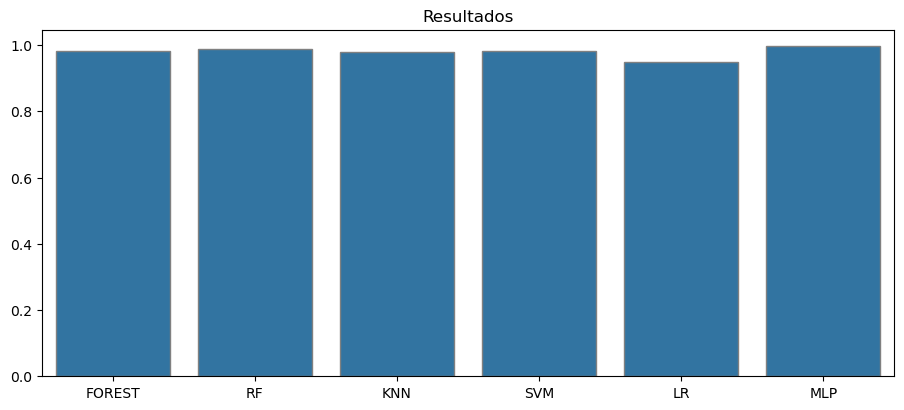

In [15]:
# Figura Regressor
fig, axs = plt.subplots(figsize=(11, 4.5))

plt.title('Resultados')
sns.barplot(x=melhores_resultados.keys(), y =melhores_resultados.values(), edgecolor='grey');

In [17]:
### sklearn.model_selections 
# Ferramentas para a seleção de modelos como CrossValidation e tuning de hiperparâmetros


from sklearn.model_selection import cross_val_score, KFold

In [ ]:
KFold

In [23]:
melhores_parametros['FOREST']


{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'best'}

In [33]:
 melhores_parametros

{'FOREST': {'criterion': 'entropy',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'splitter': 'best'},
 'RF': {'criterion': 'entropy',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 40},
 'KNN': {'n_neighbors': 20, 'p': 1},
 'SVM': {'C': 1.5, 'kernel': 'rbf', 'tol': 0.001},
 'LR': {'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001},
 'MLP': {'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}}

In [52]:
# numero de folds = 10
# numero de vezes executados = 30
### 300 testes

resultados_forest = []
resultados_rf= []
resultados_knn= []
resultados_svm= []
resultados_lr= []
resultados_mlpc = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    
    ### Instanciando os algoritmos e armazenando os resultados
    
    # arvore de decisao
    arvore = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=1, min_samples_split=5, splitter='best')
    scores = cross_val_score(estimator=arvore, X=X_credit,y=y_credit,cv=kfold)
    resultados_forest.append(scores.mean())
    
    # random forest
    random_forest = RandomForestClassifier(criterion='entropy',min_samples_leaf=1, min_samples_split=2, n_estimators=40)
    scores = cross_val_score(estimator=random_forest, X=X_credit,y=y_credit,cv=kfold)
    resultados_rf.append(scores.mean())
    
    # knn
    knn = KNeighborsClassifier(n_neighbors=20, p=1)
    scores = cross_val_score(estimator=knn, X=X_credit,y=y_credit,cv=kfold)
    resultados_knn.append(scores.mean())
    
    # Support Vector Machine
    svm = SVC(C=1.5, kernel='rbf', tol=0.001)
    scores = cross_val_score(estimator=svm, X=X_credit,y=y_credit,cv=kfold)
    resultados_svm.append(scores.mean())

    # Regressao Logistica
    lr = LogisticRegression(C=1.0, solver='lbfgs',tol=0.0001)
    scores = cross_val_score(estimator=lr, X=X_credit,y=y_credit,cv=kfold)
    resultados_lr.append(scores.mean())
    
    # Rede Neural
    mlpc = MLPClassifier(activation='relu',batch_size=10, solver='adam')
    scores = cross_val_score(estimator=mlpc, X=X_credit,y=y_credit,cv=kfold)
    resultados_mlpc.append(scores.mean())
    
    

In [56]:
resultados = pd.DataFrame({
    'Arvore': resultados_forest,
    'RandomForest': resultados_rf,
    'KNN': resultados_knn,
    'SVM': resultados_svm,
    'R_Logist': resultados_lr,
    'Rede Neural': resultados_mlpc
})

In [62]:
### Mostrando apenas 10 de 30 resultados
resultados.head(10)

,Arvore,RandomForest,KNN,SVM,R_Logist,Rede Neural
0,0.9865,0.9885,0.9800,0.9835,0.9475,0.9970
1,0.9860,0.9865,0.9800,0.9840,0.9465,0.9955
2,0.9905,0.9870,0.9800,0.9835,0.9470,0.9970
3,0.9880,0.9850,0.9800,0.9845,0.9460,0.9960
4,0.9885,0.9905,0.9810,0.9855,0.9465,0.9975
5,0.9890,0.9880,0.9785,0.9835,0.9465,0.9985
6,0.9880,0.9875,0.9800,0.9840,0.9470,0.9965
7,0.9875,0.9870,0.9805,0.9845,0.9480,0.9965
8,0.9870,0.9880,0.9810,0.9820,0.9465,0.9960
9,0.9875,0.9855,0.9810,0.9830,0.9465,0.9970


In [63]:
resultados.describe()

,Arvore,RandomForest,KNN,SVM,R_Logist,Rede Neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987400,0.986917,0.980200,0.983983,0.947000,0.996667
std,0.001561,0.001702,0.001270,0.001141,0.000743,0.000686
min,0.984000,0.984000,0.977500,0.982000,0.945500,0.995500
25%,0.986500,0.986000,0.979625,0.983500,0.946500,0.996000
50%,0.987500,0.987000,0.980000,0.984000,0.947000,0.996500
75%,0.988500,0.988000,0.981000,0.984500,0.947500,0.997000
max,0.990500,0.990500,0.983500,0.987000,0.948500,0.998500


In [68]:
# Variancia
resultados.var()

Arvore          2.437931e-06
RandomForest    2.897989e-06
KNN             1.613793e-06
SVM             1.301437e-06
R_Logist        5.517241e-07
Rede Neural     4.712644e-07
dtype: float64

In [69]:
# Desvio padrão
resultados.std()


Arvore          0.001561
RandomForest    0.001702
KNN             0.001270
SVM             0.001141
R_Logist        0.000743
Rede Neural     0.000686
dtype: float64

In [77]:
# Coeficiente de Variação

print(f"CV's (%):\t \n{(resultados.std() / resultados.mean())* 100}")

CV's (%):	 
Arvore          0.158131
RandomForest    0.172492
KNN             0.129601
SVM             0.115937
R_Logist        0.078435
Rede Neural     0.068878
dtype: float64
